*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


## Prepreation

In [1]:
import nltk
import numpy as np
import pickle
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import umap

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text.lower())



with open('C:/Users/weihao/stat359/word2vec_embeddings.pkl', 'rb') as f:
    pytorch_data = pickle.load(f)
with open('C:/Users/weihao/stat359/word2vec_gensim_embeddings.pkl', 'rb') as f:
    gensim_text8_data = pickle.load(f)
google_news = KeyedVectors.load('C:/Users/weihao/stat359/word2vec-google-news-300.model')
fasttext_wiki = KeyedVectors.load('C:/Users/weihao/stat359/fasttext-wiki-news-subwords-300.model')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weihao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\weihao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Sentence Similarity

In [3]:
# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."




In [4]:
def get_sentence_embedding(text, model, is_kv=False):
    tokens = tokenize_text(text)
    if is_kv:
        vecs = [model[w] for w in tokens if w in model]
    else:
        word2idx, embeddings = model['word2idx'], model['embeddings']
        vecs = [embeddings[word2idx[w]] for w in tokens if w in word2idx]
    return np.mean(vecs, axis=0) if vecs else np.zeros(300 if is_kv else 100)

models = [
    ("PyTorch-trained", pytorch_data, False),
    ("Gensim Word2Vec", gensim_text8_data, False),
    ("Gensim Word2Vec (Google)", google_news, True),
    ("Gensim FastText", fasttext_wiki, True)
]

all_results = {}
q_sentences = [query]
for name, model_obj, is_kv in models:
    scores = []
    q_vec = get_sentence_embedding(query, model_obj, is_kv).reshape(1, -1)
    for s in sentences:
        s_vec = get_sentence_embedding(s, model_obj, is_kv).reshape(1, -1)
        sim = cosine_similarity(q_vec, s_vec)[0][0]
        scores.append(round(sim, 4))
    all_results[name] = scores

df_sim = pd.DataFrame(all_results, index=sentences)
display(df_sim)

,PyTorch-trained,Gensim Word2Vec,Gensim Word2Vec (Google),Gensim FastText
The cat sat on the mat.,0.6153,0.6805,0.7369,0.9114
A dog is playing in the yard.,0.5767,0.5843,0.6483,0.8512
I need to buy groceries today.,0.4391,0.1830,0.3718,0.5858
The feline was resting on the rug.,0.4937,0.4533,0.7794,0.9247
Canines enjoy outdoor activities.,0.3341,0.0888,0.4281,0.6504
My shopping list includes milk and bread.,0.4612,0.4717,0.4970,0.8350
The weather is beautiful today.,0.5451,0.4999,0.4310,0.8090
Programming requires logical thinking.,0.2626,0.0545,0.2979,0.6135


## Embedding Visualization

In [5]:
animals = [
    'dog', 'cat', 'horse', 'cow',
    'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin',
    'shark', 'whale', 'dolphin', 'tuna'
]

foods = [
    'apple', 'orange', 'banana', 'grape',
    'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish',
    'coffee', 'tea', 'juice', 'water'
]

In [6]:
def extract_vectors(model, words, is_kv):
    if is_kv:
        valid_words = [w for w in words if w in model]
        vecs = [model[w] for w in valid_words]
    else:
        word2idx, embeddings = model['word2idx'], model['embeddings']
        valid_words = [w for w in words if w in word2idx]
        vecs = [embeddings[word2idx[w]] for w in valid_words]
    return valid_words, np.array(vecs)
def compute_reductions(vecs_array):
    tsne_res = TSNE(n_components=2, perplexity=5, random_state=42).fit_transform(vecs_array)
    umap_res = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42).fit_transform(vecs_array)
    return tsne_res, umap_res

c:\Users\weihao\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\weihao\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\weihao\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\weihao\stat359\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\weihao\stat359\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\weihao\stat359\.venv\Lib\site-pack

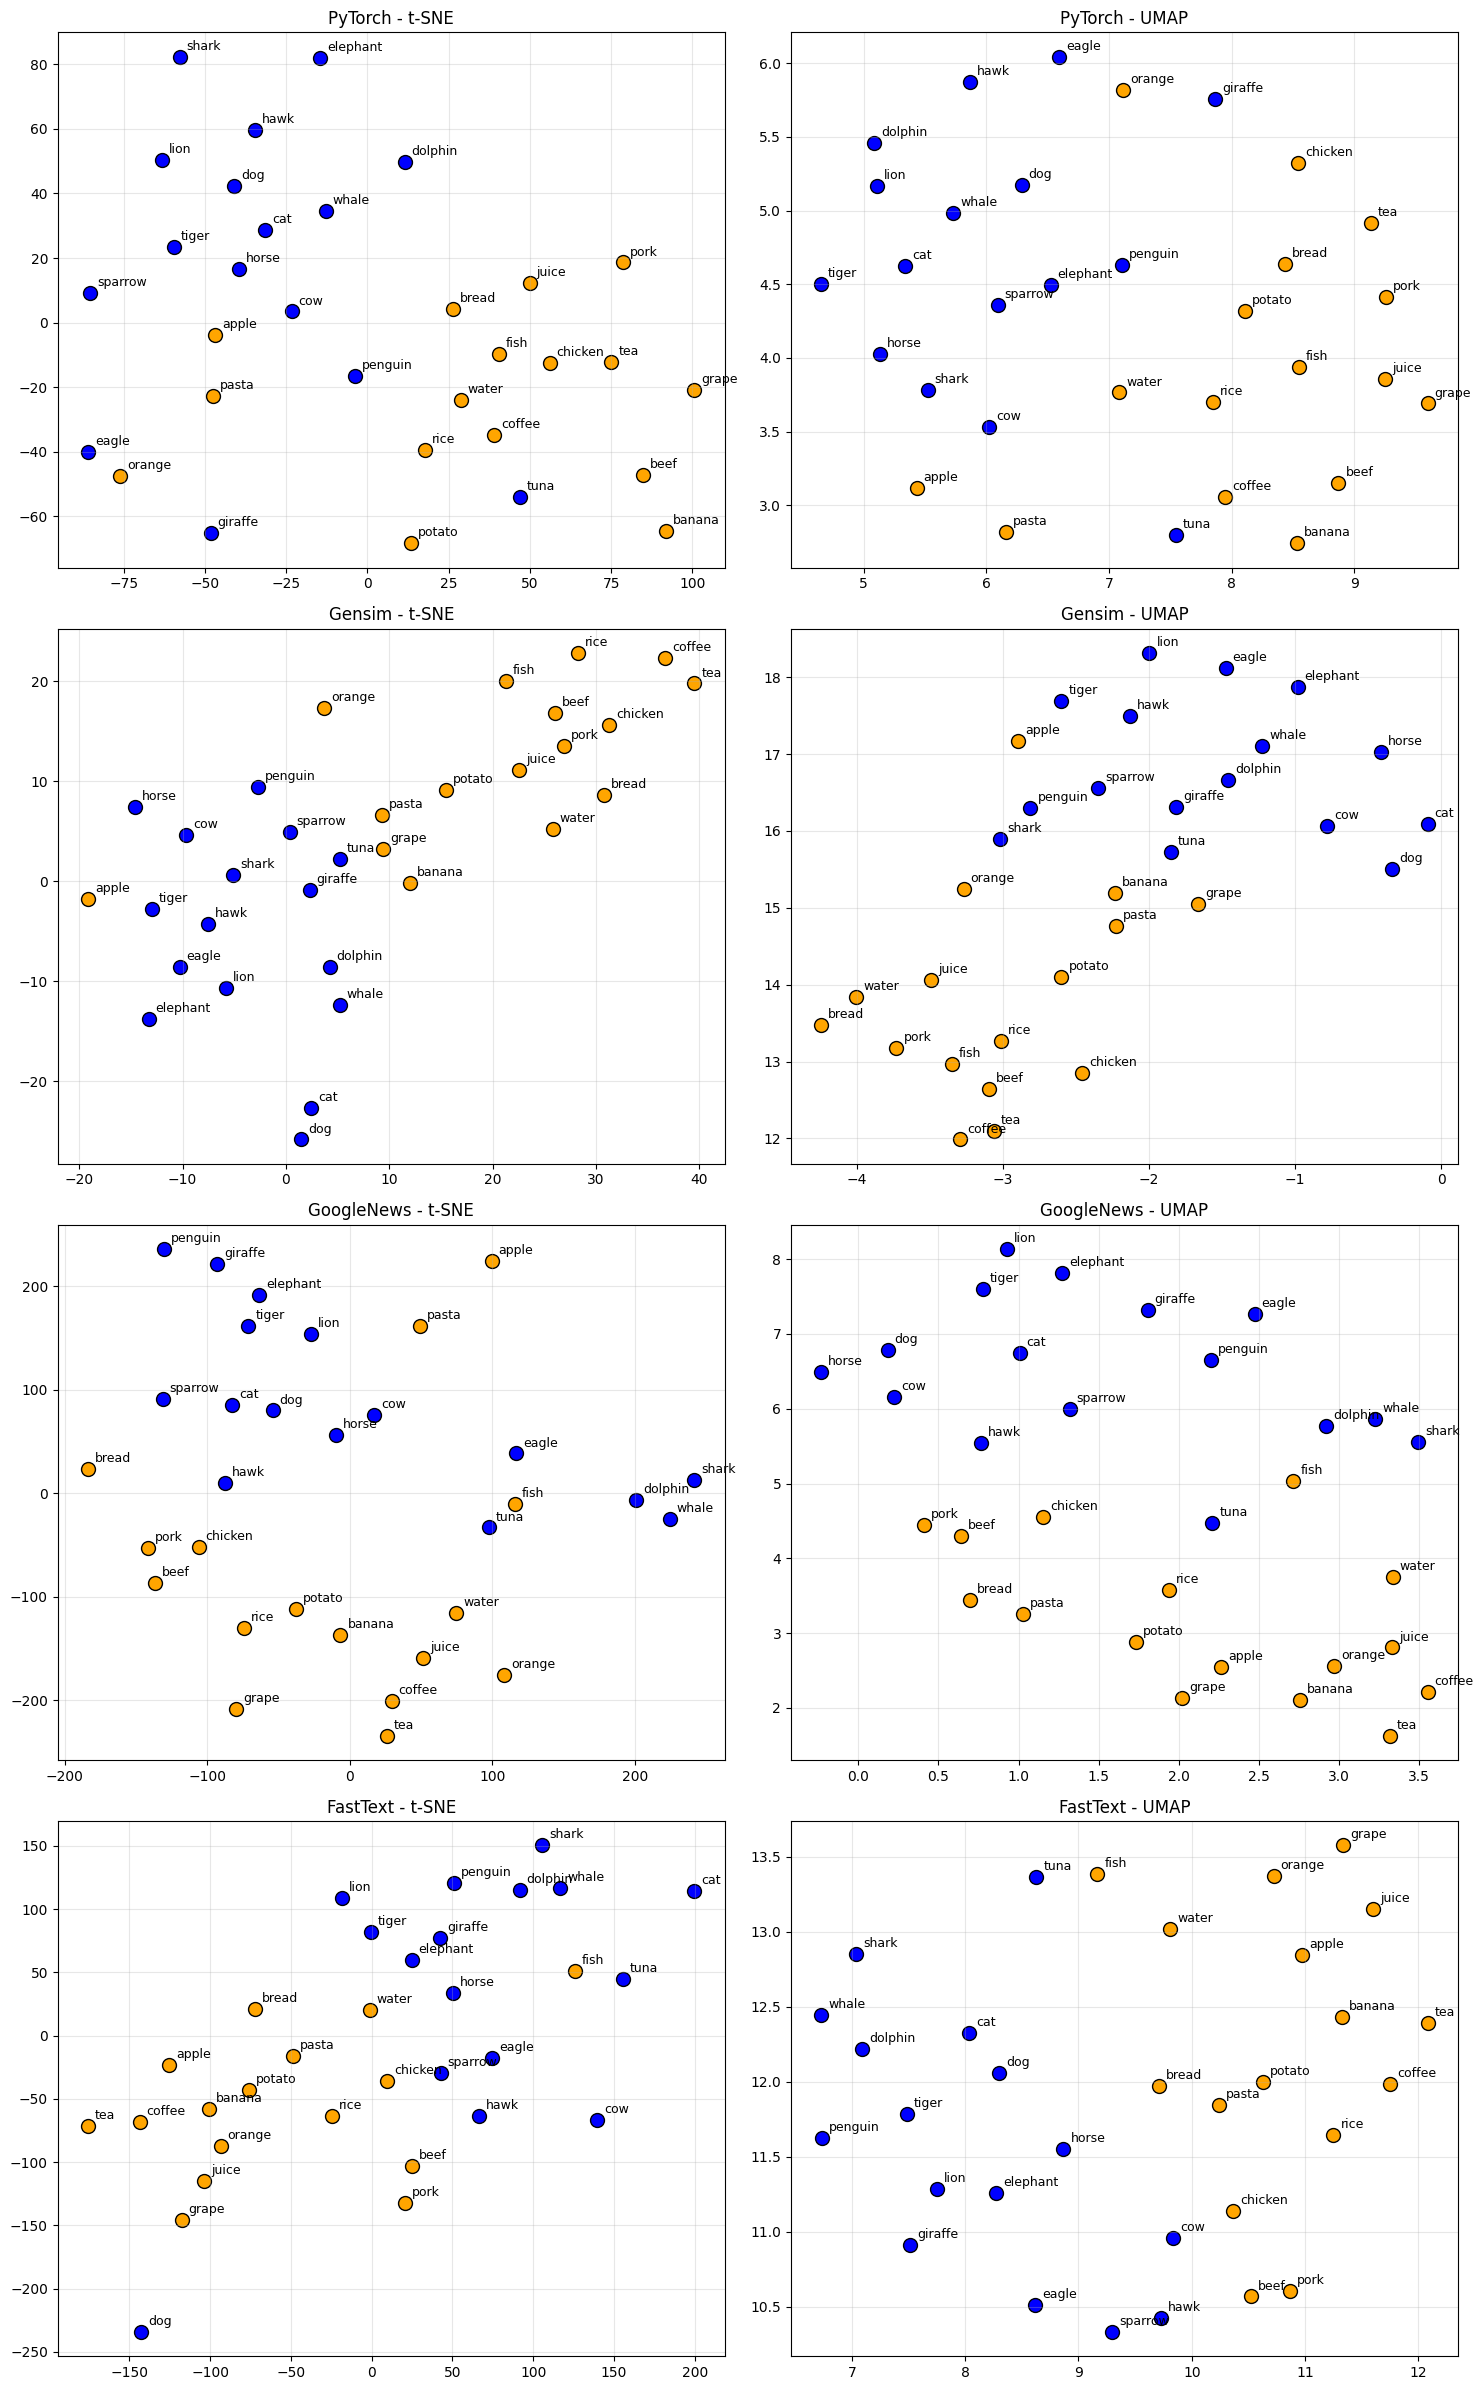

In [7]:
def setup_plot_style(ax, title, res, words, animals):
    for i, w in enumerate(words):
        color = 'blue' if w in animals else 'orange'
        ax.scatter(res[i, 0], res[i, 1], c=color, edgecolors='k', s=100)
        ax.annotate(w, (res[i, 0], res[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=9)
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

def plot_reduction_comparison(animals, foods, model_configs):
    words = animals + foods
    fig, axes = plt.subplots(len(model_configs), 2, figsize=(15, 24))
    
    for i, (model, model_name, is_kv) in enumerate(model_configs):
        valid_words, vecs_array = extract_vectors(model, words, is_kv)
        tsne_res, umap_res = compute_reductions(vecs_array)
        setup_plot_style(axes[i, 0], f"{model_name} - t-SNE", tsne_res, valid_words, animals)
        setup_plot_style(axes[i, 1], f"{model_name} - UMAP", umap_res, valid_words, animals)
    plt.tight_layout()
    plt.show()

configs = [
    (pytorch_data, "PyTorch", False),
    (gensim_text8_data, "Gensim", False),
    (google_news, "GoogleNews", True),
    (fasttext_wiki, "FastText", True)
]
plot_reduction_comparison(animals, foods, configs)

## Short Answer Question

I think Google Word2vec model performed best at captruing sentence meaning. This model have a really high score on the similar sentence meaning. "The feline was resting on the rug" have a highest score 0.7794, which is the query sentence meaning. FastText also give a high score on this sentence, but this model output a high result on these two sentences, "My shopping list includes milk and bread." and "The weather is beautiful today." These two sentences have different meanings but get around 0.8. Google Word2vec have lower score, so this model proform the best.
Pretrained embedding modles are better than my own model. Pretrained can captured the synonyms meaning, and get more accurate answer. Pytorch trained model cannot identify synonyms. The result can only be derived from the literal meaning of the words. And from the plotgraph, pretrained model have a clear sepreated two part for food and animals. My own modle mixes them together to some animals and food, which is mot very separated.
The reason why the differences in performance is how they trained and dimensional vector trained. Google Word2vec model's database trained on Google News, and FastText trained incluedes subword information. This involves a large amount of data and the complex meanings of words. My own model and Word2Vec trained on the Text8, which do not have a huge amount of data and meanings. Also, the Pre-trained model uses higher dimensions, which is 300-dimensional. Pre-trained model can get the information and detail more clearly and accurate.

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** (name + version if known)
- **How you used them:** (e.g., concept explanation, debugging, drafting code, rewriting text)
- **What you verified yourself:** (e.g., reran the notebook, checked outputs/plots, checked shapes, read documentation)
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.




- **Tool(s) used:** Gemini3
- **How you used them:** I use gemini 3 to help me explain the part 2. It's the first time I try to use other python program in the python, which I do not know some function and method to do the task. I use gemini to provide me some method and learn from it. I also use Gemini to stucture my program and help me debugg.
- **What you verified yourself:** Check the result of similarity and plot, and do some basic analysis. Also check a bug from gensim_train_word2vec.py(output pkl file is empty).